In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as ptc 
import math
import random
from tensorflow.keras.utils import plot_model

from PIL import Image


In this section you can experiment with whatever ConvNet architecture you'd like on CIFAR-10.

You should experiment with architectures, hyperparameters, loss functions, or anything else you can think of to train a model that achieves **at least 70%** accuracy on the **Test** set within 30 epochs.

In [5]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.cifar10.load_data()
x_train = x_train0.reshape(50000, 32, 32, 3).astype("float32") / 255.0
x_test = x_test0.reshape(10000, 32, 32, 3).astype("float32") / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)


In [ ]:
for i, img in enumerate(x_test0[0:64]):
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #prediction = model.predict(x_test[i:i+1])
    #pred_label = np.argmax(prediction)
    
   
    plt.tight_layout()

In [15]:
def MyNet():
   
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(32,32,3), name = 'input'),

        #use padding so the img doesnt get shrunk
        tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', padding = 'same'),
        tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(), #reduce the dimensions and keep only the nescessary data
        tf.keras.layers.Dropout(0.25), #dropout so that the net doesn't start memorizing the dataset

        #do it again but increase the filters
        tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', padding = 'same'), #increase the filters to 64
        tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax', name= 'output')
       
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


In [16]:
model = MyNet()
training_history = model.fit(x_train, y_train, batch_size=128, epochs=30)

c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.3946 - loss: 1.6436
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.5546 - loss: 1.2358
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.6203 - loss: 1.0726
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.6579 - loss: 0.9697
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.6883 - loss: 0.8879
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7094 - loss: 0.8287
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.7261 - loss: 0.7815
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7403 - loss: 0.7369
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7548 - loss: 0.6988
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7654 - loss: 0.6593
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.7738 - loss: 0.6374
Epoch 12/30
391/391 ━━━━━━━━━━

In the cell below:  

1) Plot the network diagram
2) Write an explanation of what you did
3) Plot the loss and accuracy graph over epoches
4) Report accuracy on Test dataset. 

In [19]:
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)
#plot model will not work for me even though I have the library downloaded and installed

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.6397
Test Accuracy: 79.75%


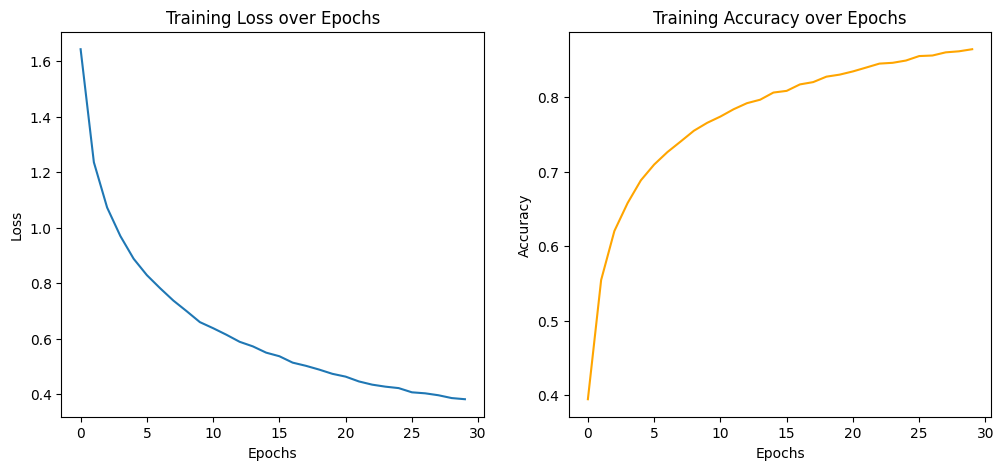

In [18]:
Loss = training_history.history['loss']
Accuracy = training_history.history['accuracy']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')


plt.subplot(1, 2, 2)
plt.plot(Accuracy, label='Training Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')


plt.show()      

What I did:
Firstly I started with the base of what we did in class for the MINST data set. The first issue I ran into was that the accuracy throughout training was not getting very high, so I added another Conv2d layer to get a higher accuracy. The next issue I ran into was that the net seemed to just be memorizing the data, as the test accuracy was low but the training accuracy was high. So I decided to add dropout layers that randomly drop out a certain percentage of the data while also adding the MaxPooling2d to stop the net from memorizing the training data. Then I added a Dense layer with 256 neurons to help it learn better since there are 10 possibilities. Finally I needed to get slightly higher accuracy on the training data so I added another set of layers similar to the first set, but having the Conv2D have 64 filters on it instead of 32 to try and help with the learning. This gave me a lower accuracy when training but a much higher accuracy on the test data.